In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
import torchvision.transforms as transforms
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
])

In [16]:
import torch
from Augmentor.Operations import Distort

In [17]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

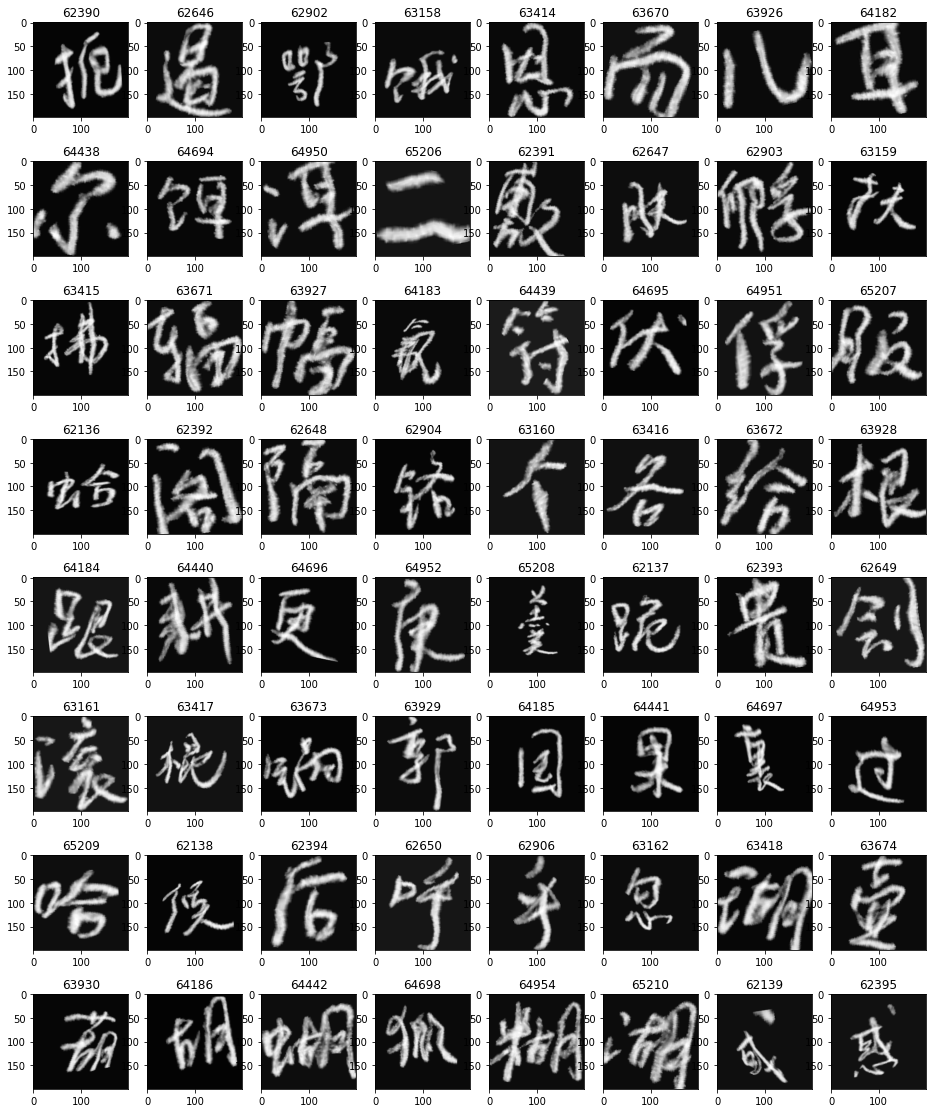

In [18]:
data = np.load('train.npy/train.npy', allow_pickle=True)
test = np.load('test.npy/test.npy', allow_pickle=True)
width, height = 8, 8

plt.figure(figsize=(16, 20))
for n, (image, tag) in enumerate(data, 1):
    if n > width * height:
        break
    plt.subplot(height, width, n)
    plt.title(tag)

    sh = image.shape
    sh = (int(sh[0] / max(sh) * 200), int(sh[1] / max(sh) * 200))
    trans = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(sh)
    ])
    image = trans(image)[0].numpy()
    result = np.zeros((200, 200), dtype = np.float32)
    result[
        (200 - sh[0])//2:(200 - sh[0])//2 + image.shape[0],
        (200 - sh[1])//2:(200 - sh[1])//2 + image.shape[1]
    ] = 1 - image

    image = transforms.ToPILImage()(result)
    d = Distort(probability=0.5, grid_height=5, grid_width=5, magnitude=10)
    image = d.perform_operation([image])[0]
    trans1 = transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomAffine(15),
        transforms.RandomPerspective(),
        transforms.Resize(200),
        # transforms.Normalize(mean=0.0, std=1.0),
        # AddGaussianNoise(0.0, np.random.uniform(0.0,0.1)),
        transforms.Normalize(mean=0.0, std=1.0),
    ])
    image = trans1(image)[0]

    plt.imshow(image, cmap='gray')

In [19]:
#ymax = 0
#xmax = 0
#for n, (image, tag) in enumerate(data, 1):
#    ymax = max(image.shape[0], ymax)
#    xmax = max(image.shape[1], xmax)
#ymax, xmax

In [20]:
labels = data[:, 1]
images = data[:, 0]

In [21]:
for i, image in enumerate(images):
    #result = np.zeros((ymax, xmax), dtype=np.uint8)
    #result[:image.shape[0],:image.shape[1]] = 255 - image
    images[i] = 255 - image 

In [22]:
for i, image in enumerate(test):
    #result = np.zeros((ymax, xmax), dtype=np.uint8)
    #result[:image.shape[0],:image.shape[1]] = 255 - image
    test[i] = 255 - image 

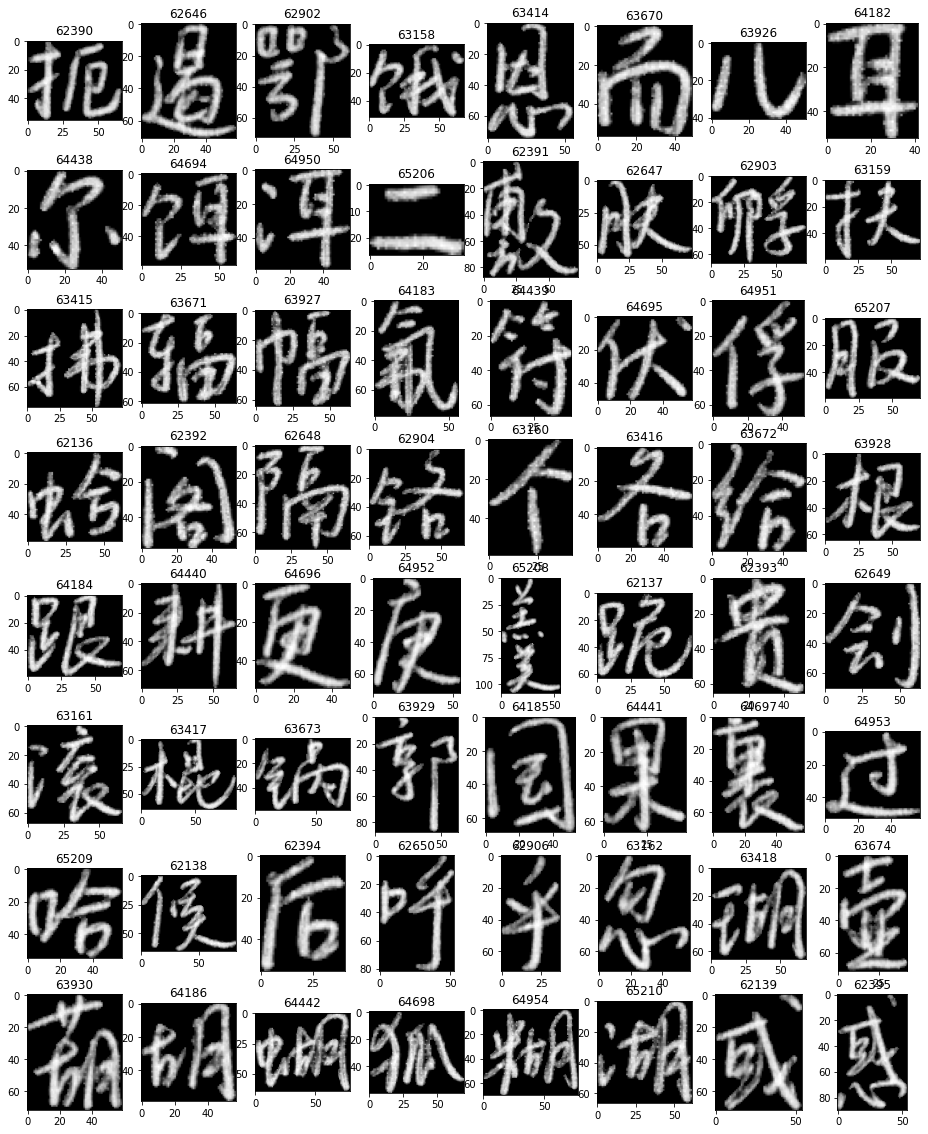

In [23]:
plt.figure(figsize=(16, 20))
for n, (image, tag) in enumerate(data, 1):
    if n > width * height:
        break
    plt.subplot(height, width, n)
    plt.title(tag)

    plt.imshow(image, cmap='gray')

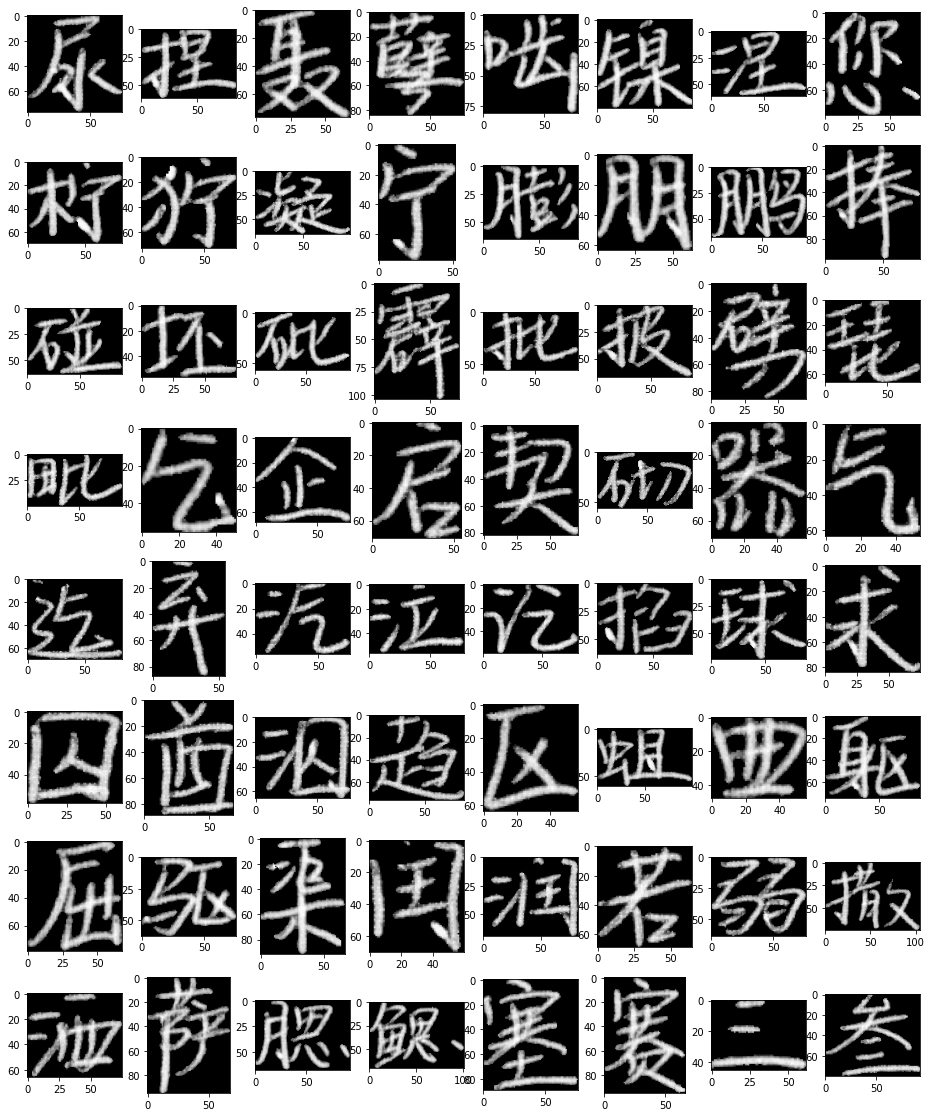

In [24]:
plt.figure(figsize=(16, 20))
for n, image in enumerate(test, 1):
    if n > width * height:
        break
    plt.subplot(height, width, n)
    plt.imshow(image, cmap='gray')

In [25]:
fname = 'drive/MyDrive/mytrain/pictblock.txt'
filee = open(fname, 'r')
blocklen = int(filee.read())
filee.close()
print(blocklen)

200000


In [26]:
newlabels = labels.astype(np.int)
#newimages = np.concatenate(images).reshape((-1, ymax, xmax))
newimages = images

perm = np.random.permutation(newimages.shape[0])

print(perm)

newimages = newimages[perm]
newlabels = newlabels[perm]

idx_trn = np.random.choice([0, 1], size=len(labels), p=[0.5/10, 9.5/10]).astype(np.bool)
idx_val = (1 - idx_trn).astype(np.bool)
print(idx_trn)
print(idx_val)

newimages_trn = newimages[idx_trn]
newimages_val = newimages[idx_val]
newlabels_trn = newlabels[idx_trn]
newlabels_val = newlabels[idx_val]


i = 0
while i * blocklen < newimages_trn.shape[0]:
    np.save(
        'drive/MyDrive/mytrain/images_trn'+str(i), 
        newimages_trn[i * blocklen:min(newimages_trn.shape[0], (i+1)*blocklen)],
        allow_pickle=True)
    i += 1
i = 0
while i * blocklen < newimages_val.shape[0]:
    np.save(
        'drive/MyDrive/mytrain/images_val'+str(i), 
        newimages_val[i * blocklen:min(newimages_val.shape[0], (i+1)*blocklen)],
        allow_pickle=True)
    i += 1
i = 0
while i * blocklen < newimages.shape[0]:
    np.save(
        'drive/MyDrive/mytrain/images_all'+str(i), 
        newimages[i * blocklen:min(newimages.shape[0], (i+1)*blocklen)],
        allow_pickle=True)
    i += 1
i = 0
while i * blocklen < test.shape[0]:
    np.save(
        'drive/MyDrive/mytrain/images_tst'+str(i), 
        test[i * blocklen:min(test.shape[0], (i+1)*blocklen)],
        allow_pickle=True)
    i += 1
print("Test size:", test.shape[0])

np.save('drive/MyDrive/mytrain/labels_all', newlabels, allow_pickle=True)
np.save('drive/MyDrive/mytrain/labels_trn', newlabels_trn, allow_pickle=True)
np.save('drive/MyDrive/mytrain/labels_val', newlabels_val, allow_pickle=True)

[ 50142 143516 123521 ... 162267  74563 141697]
[ True  True  True ...  True  True  True]
[False False False ... False False False]
Test size: 41428
